# AutoEncoder_MNIST_HighCompression#
### In this example I just want to illustrate the use of "transposedConvLayer" to make an Autoencoder. In this example Max Pool Layers are being used in order to obtain a grater compression.
#### Network ####
Input(28,28,1) - Conv(3,3)  - Maxp (2,2) - Conv(3,3) - Maxp(2,2) - Out (12,12,5) - 2xTransposedConv(2,2) - Output (28,28,1)
#### Note ####
Converges to a nice solution almost always

In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.3
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [18]:
# Load Mnist
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', version=1, cache=True)
trX, teX, trY, teY = train_test_split(mnist.data / 255.0, mnist.target.astype("int0"), test_size = 0.33)

# Data vectors are expected in columns
trX = trX.transpose();
teX = teX.transpose();

In [17]:
# dataset properties
print("Values per Image training:", trX.shape[0])
print("Number of images for training:", trX.shape[1])
# dataset properties
print("Values per Image testing:", teX.shape[0])
print("Number of images for testing:", teX.shape[1])
from matplotlib import pyplot as plt
%matplotlib inline 

Values per Image training: 784
Number of images for training: 46900
Values per Image testing: 23100
Number of images for testing: 784


In [5]:
#subsample if necessary
trainSampleSize = 46900;
trXSub = trX[:,0:trainSampleSize]

In [6]:
# importlib.reload(pyb) # For some reason, this appears not to be working

In [7]:
deepAE = pyb.AutoEncoderExample6(28,28,1)


Conv In Depth: 1 In Height: 28 In Width: 28 Out Depth: 16 Out Height: 28 Out Width: 28
Maxp In Depth: 16 In Height: 28 In Width: 28 Out Depth: 16 Out Height: 14 Out Width: 14
Conv In Depth: 16 In Height: 14 In Width: 14 Out Depth: 4 Out Height: 14 Out Width: 14
Maxp In Depth: 4 In Height: 14 In Width: 14 Out Depth: 4 Out Height: 7 Out Width: 7
Tran In Depth: 4 In Height: 7 In Width: 7 Out Depth: 16 Out Height: 14 Out Width: 14
Tran In Depth: 16 In Height: 14 In Width: 14 Out Depth: 1 Out Height: 28 Out Width: 28


In [8]:
# train and test (prints some result and returns test results)
deepAE.Train(trXSub,trXSub,0.0005,15)

Loss of a given sample at epoch: 0
0.00754249
Loss of a given sample at epoch: 1
0.00503982
Loss of a given sample at epoch: 2
0.00366661
Loss of a given sample at epoch: 3
0.00384676
Loss of a given sample at epoch: 4
0.00686421
Loss of a given sample at epoch: 5
0.00319163
Loss of a given sample at epoch: 6
0.00546313
Loss of a given sample at epoch: 7
0.00903001
Loss of a given sample at epoch: 8
0.00884741
Loss of a given sample at epoch: 9
0.000629218
Loss of a given sample at epoch: 10
0.00227594
Loss of a given sample at epoch: 11
0.00380691
Loss of a given sample at epoch: 12
0.0048959
Loss of a given sample at epoch: 13
0.00248684
Loss of a given sample at epoch: 14
0.00755381


testing:
784rows


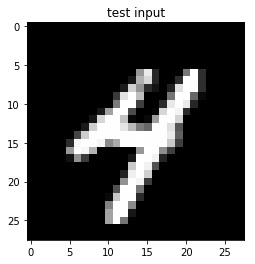

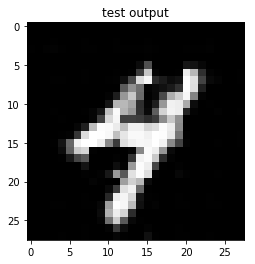

In [20]:
sampleNum = 11
deepAEOut = deepAE.Test(teX[:,sampleNum])
plt.title("test input")
plt.imshow(np.reshape(teX[:,sampleNum],(28,28)), interpolation='nearest', cmap='gray')
plt.show()
plt.title("test output")
plt.imshow(np.reshape(deepAEOut,(28,28)), interpolation='nearest', cmap='gray')
plt.show()

In [ ]:
deepAEOut